# Regressions

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import folium

In [2]:
# Settings
pd.set_option('display.max_columns', 50)  # Set max number of columns to display
pd.set_option('display.max_rows', 200)    # Set max number of rows to display

# Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# data_folder = Path("../Data/data_output_rendimiento")
# filename = "df_rendimiento_flagged_ONI.csv"
data_folder = Path("/content/drive/MyDrive/regressions")
filename = "yields_panel.csv"
df = pd.read_csv(data_folder / filename)

# Explore Data in file

In [6]:
df.columns

Index(['producer_id', 'zone', 'lot', 'plot', 'orig_crop', 'variety',
       'seedtime', 'harvest_date', 'flag', 'Unnamed: 10', 'show_furrow',
       'n_plants_m', 'n_plants_ha', 'date_beginning_flowering',
       'mature_maturation_date', 'plant_height', 'fertitilized',
       'type_of_fertilizer', 'dose_kg_ha', 'rend_ton_ha',
       'cond_climaticas_de_la_campana', 'producer_handling', 'notes', 'id_lot',
       'cultivation_id', 'culture', 'yr', 'summer', 'latitude', 'longitude',
       'flowering_date', 'seed_date', 'diff_date', 'closest_date_index_ndvi',
       'closest_date_index_ndpi', 'closest_date_index_pp',
       'closest_date_index_vhi', 'closest_id_grid', 'ndvi', 'ndpi', 'pp',
       'vhi', 'ndvi_anomaly', 'ndpi_anomaly', 'pp_anomaly', 'vhi_anomaly',
       'ndvi_anomaly_minus_1_month', 'ndpi_anomaly_minus_1_month',
       'pp_anomaly_minus_1_month', 'vhi_anomaly_minus_1_month',
       'ndvi_anomaly_minus_2_month', 'ndpi_anomaly_minus_2_month',
       'pp_anomaly_minus_2_mon

In [7]:
df_missings = pd.DataFrame({'column':list(df.columns), 'missings': list(df.count())})
df_missings

,column,missings
0,producer_id,760
1,zone,760
2,lot,760
3,plot,760
4,orig_crop,760
5,variety,736
6,seedtime,718
7,harvest_date,710
8,flag,760
9,Unnamed: 10,0


In [8]:
df.groupby('summer').agg(n = ('zone','count'))

,n
summer,
0,409
1,351


# Ubicación geográfica

Utilizar folium para tener una idea de la ubicación geográfica de los puntos de referencia.

In [9]:
#Locate centroid based on latitude and longitude
center = [ df["latitude"].mean(), df["longitude"].mean()]

In [100]:
#Create a Folium Map centered at the center coordinates to add layers of points
map = folium.Map(location = center, zoom_start = 8)

#Create a palette to color the markers based on category
unique_categories = df['zone'].unique()
palette = sns.color_palette("hsv", len(unique_categories)).as_hex()
color_map = dict(zip(unique_categories, palette))

for _, row in df.iterrows():
  folium.CircleMarker(
      location = [row["latitude"], row["longitude"]],
      radius = 6,
      color = color_map[row['zone']],
      opacity = 0.1,
      #fill = True,
      fill_color = color_map[row['zone']],
      fill_opacity = 0.1,
      popup = row['zone'],
      icon = folium.Icon(color='green')
  ).add_to(map)

#Display Map
map

In [11]:
df.groupby('yr').agg(n = ('yr','count'))

,n
yr,
2013,77
2014,169
2015,166
2016,166
2017,131
2018,51


# Conclusiones iniciales

* Data since 2013 up to 2018 of crop yields.
* This data comes from crops in the north region of Santa Cruz, Bolivia.

# Plot data

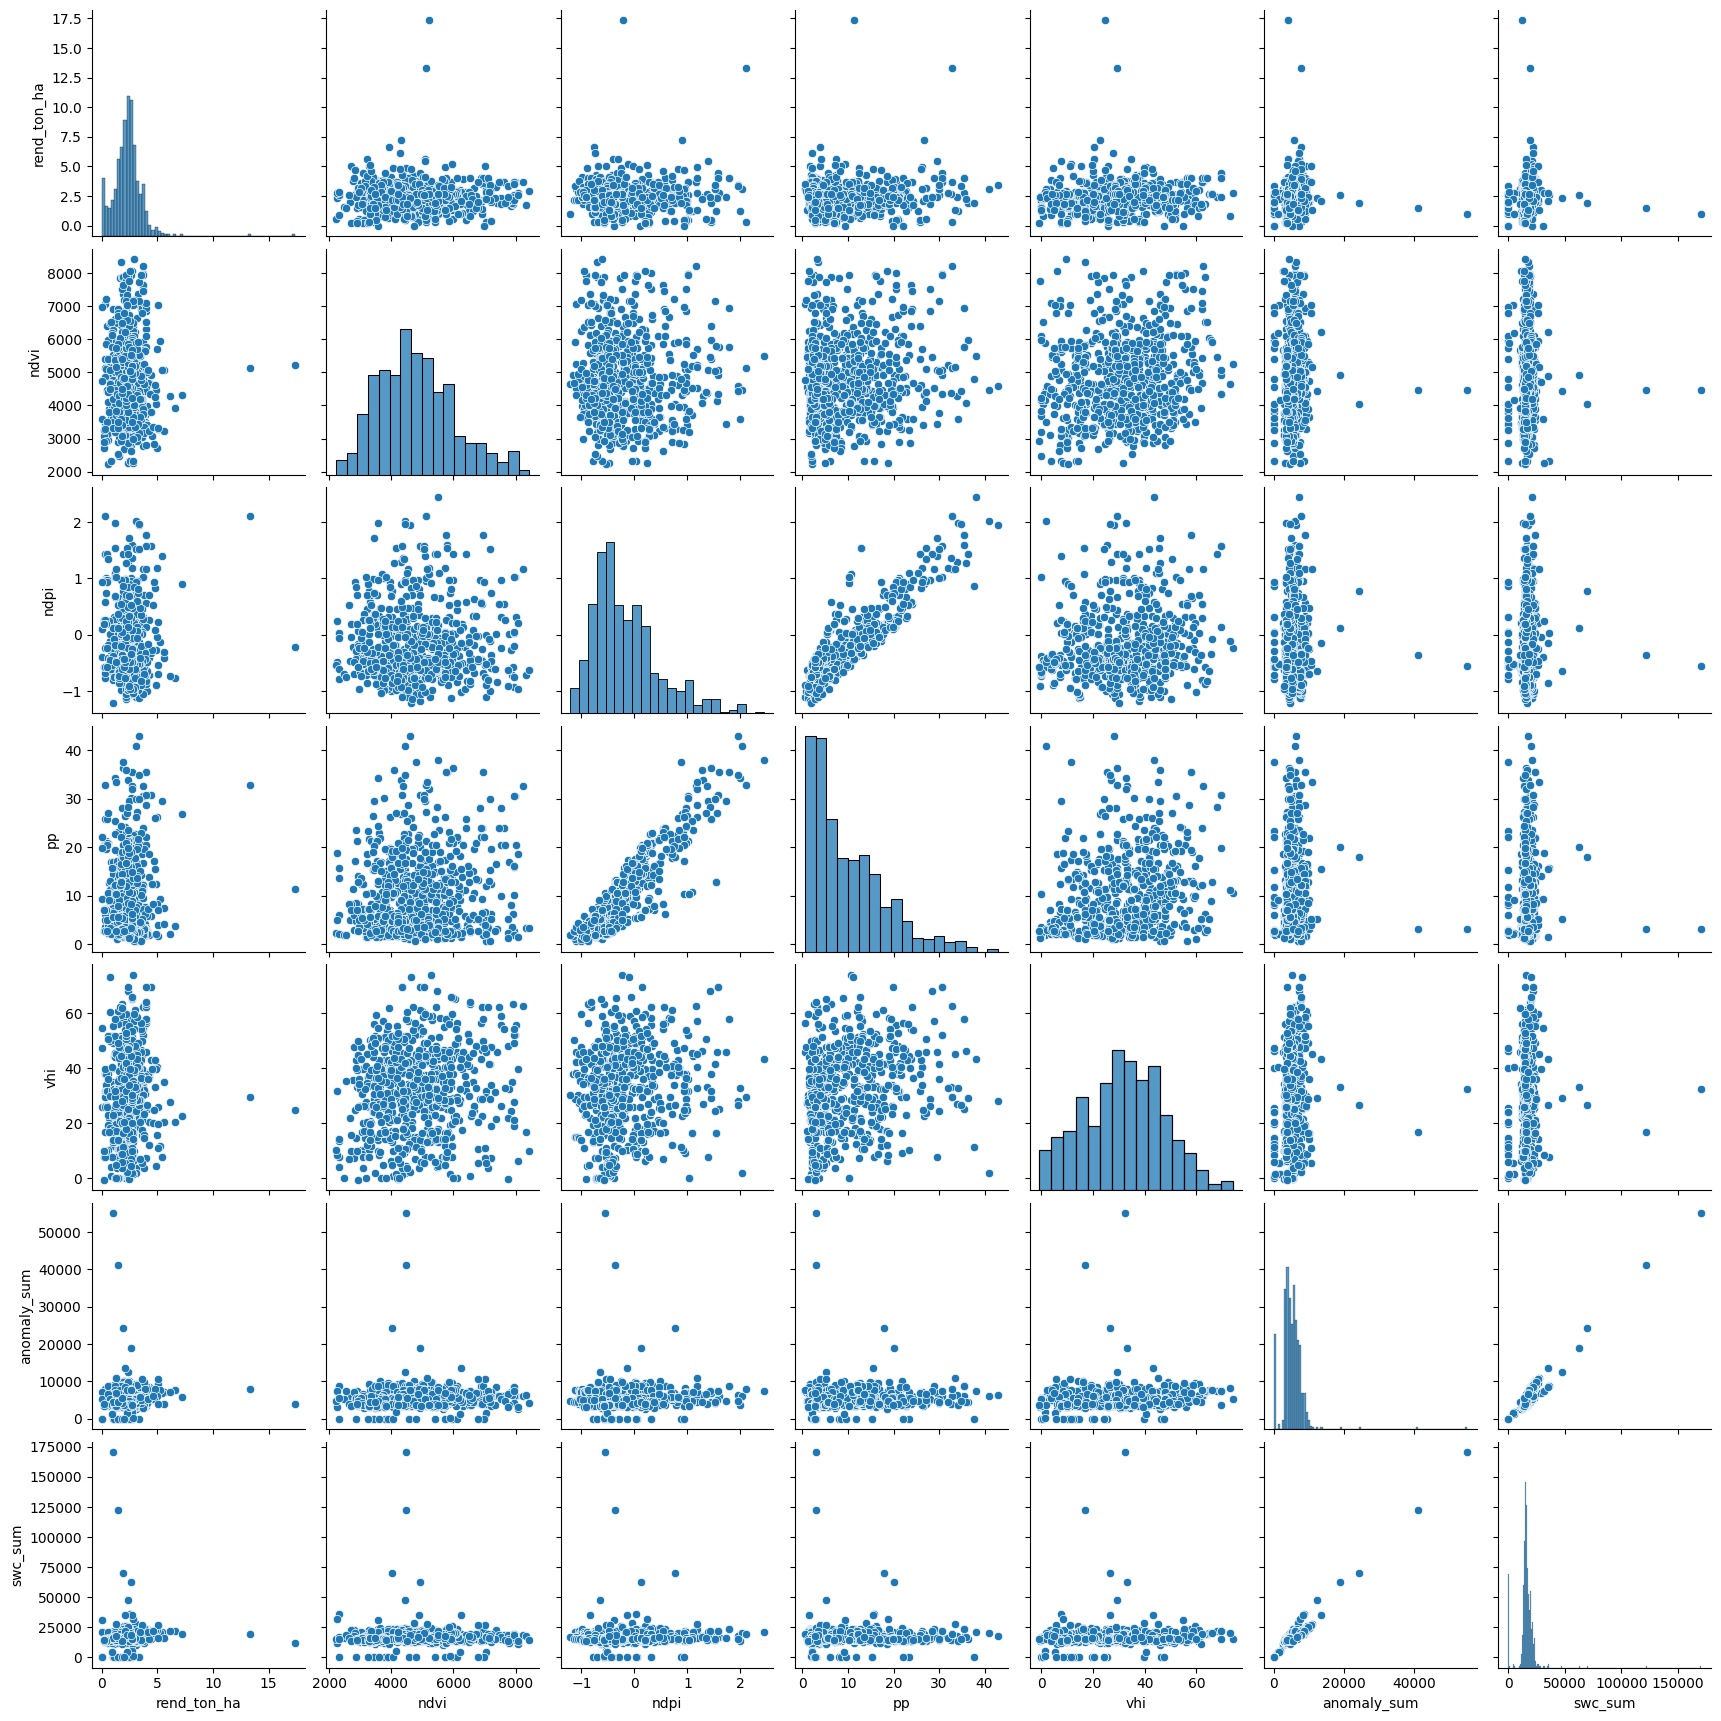

In [15]:
sns.pairplot(df, vars=["rend_ton_ha", "ndvi", "ndpi", "pp", "vhi", "anomaly_sum", "swc_sum"])

# Plot seedtime

In [ ]:
# Assuming df is your DataFrame with the "seedtime" column

# Convert "seedtime" column to datetime format
df["seedtime"] = pd.to_datetime(df["seedtime"], errors="coerce")

In [ ]:
df["seedtime"]

,seedtime
0,NaT
1,2013-03-10
2,2013-03-19
3,2013-03-31
4,2013-04-01
...,...
755,NaT
756,NaT
757,NaT
758,NaT


In [ ]:
# Extract month and year
df["month"] = df["seedtime"].dt.month
df["year"] = df["seedtime"].dt.year

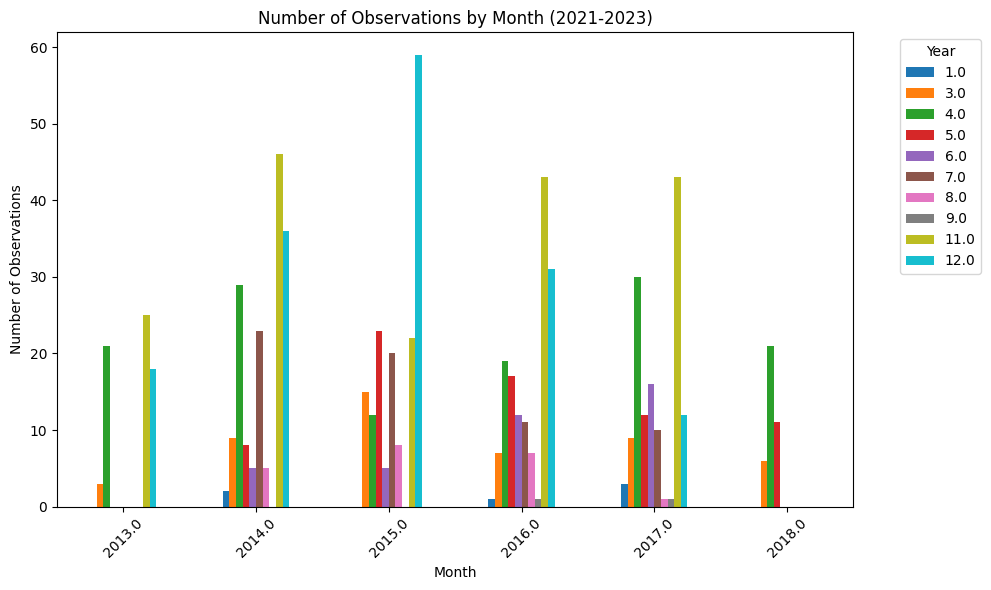

In [ ]:
# Extract month and year
df["month"] = df["seedtime"].dt.month
df["year"] = df["seedtime"].dt.year

# Group by month and year and count observations
monthly_counts = df.groupby(["year", "month"]).size().unstack(fill_value=0)

# Plot the bar chart
monthly_counts.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Number of Observations by Month (2021-2023)")
plt.xticks(rotation=45)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Create and/or impute variables

In [17]:
def group_categories_MT(df, group_categories):
    """
    Groups the categories of a categorical variable in a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the client variables.
        group_categories (dict): Dictionary that contains the categories to be grouped.
                                 The keys are the column names, and the values are dictionaries
                                 where the keys are the new categories and the values are lists
                                 of the original categories to be grouped under the new category.

    Returns:
        pd.DataFrame: Modified DataFrame with grouped category columns.
    """
    features_group = group_categories["categories"]

    for column in features_group:
        for new_category, original_categories in features_group[column].items():
            df[column] = df[column].replace(original_categories, new_category)

    return df

In [16]:
def modify_categories(
    df_var_clientes: pd.DataFrame(), params_modificacion_categorias
) -> pd.DataFrame():
    """Modify categories in the dataset based on specified values.

    Args:
        df (pd.DataFrame): The complete dataset with all variables.
        params_modificacion_categorias (dict): A dictionary containing the column and the desired categories for that column.
            Other categories not specified will be replaced with 'OTRO'.

    Returns:
        pd.DataFrame: The modified dataset with updated categories.

    Example:
        >>> df = modify_categories(df, params_modificacion_categorias)
    """

    # Parameters
    variables_valores = params_modificacion_categorias["variables_valores"]

    for col in variables_valores:
        df[col] = df[col].apply(
            lambda x: x if x in variables_valores[col] else "OTRO"
        )

    return df_var_clientes


In [19]:
params_group_categ = {
    'categories': {
        'orig_crop': {
            'GIRASOL': ['Girasol'],
            'MAIZ': ['Maiz', 'Maiz ensilaje'],
            'TRIGO': ['Trigo'],
            'SOYA': ['Soya'],
            'SORGO': ['Sorgo', 'Sorgo doble proposito', 'Sorgo doble proposito ensilaje', 'Sorgo Forrajero'],
        }
    }
}
params_modif_categ = {
    'variables_valores': {
        'orig_crop': ['GIRASOL', 'MAIZ', 'TRIGO', 'SOYA', 'SORGO']
    }
}

In [20]:
df = group_categories_MT(df, params_group_categ)
df = modify_categories(df, params_modif_categ)

In [28]:
df_backup = df.copy()
df = df.dropna(subset=["rend_ton_ha", "ndpi"]).copy()
df["rend_ton_ha"] = df["rend_ton_ha"]

# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


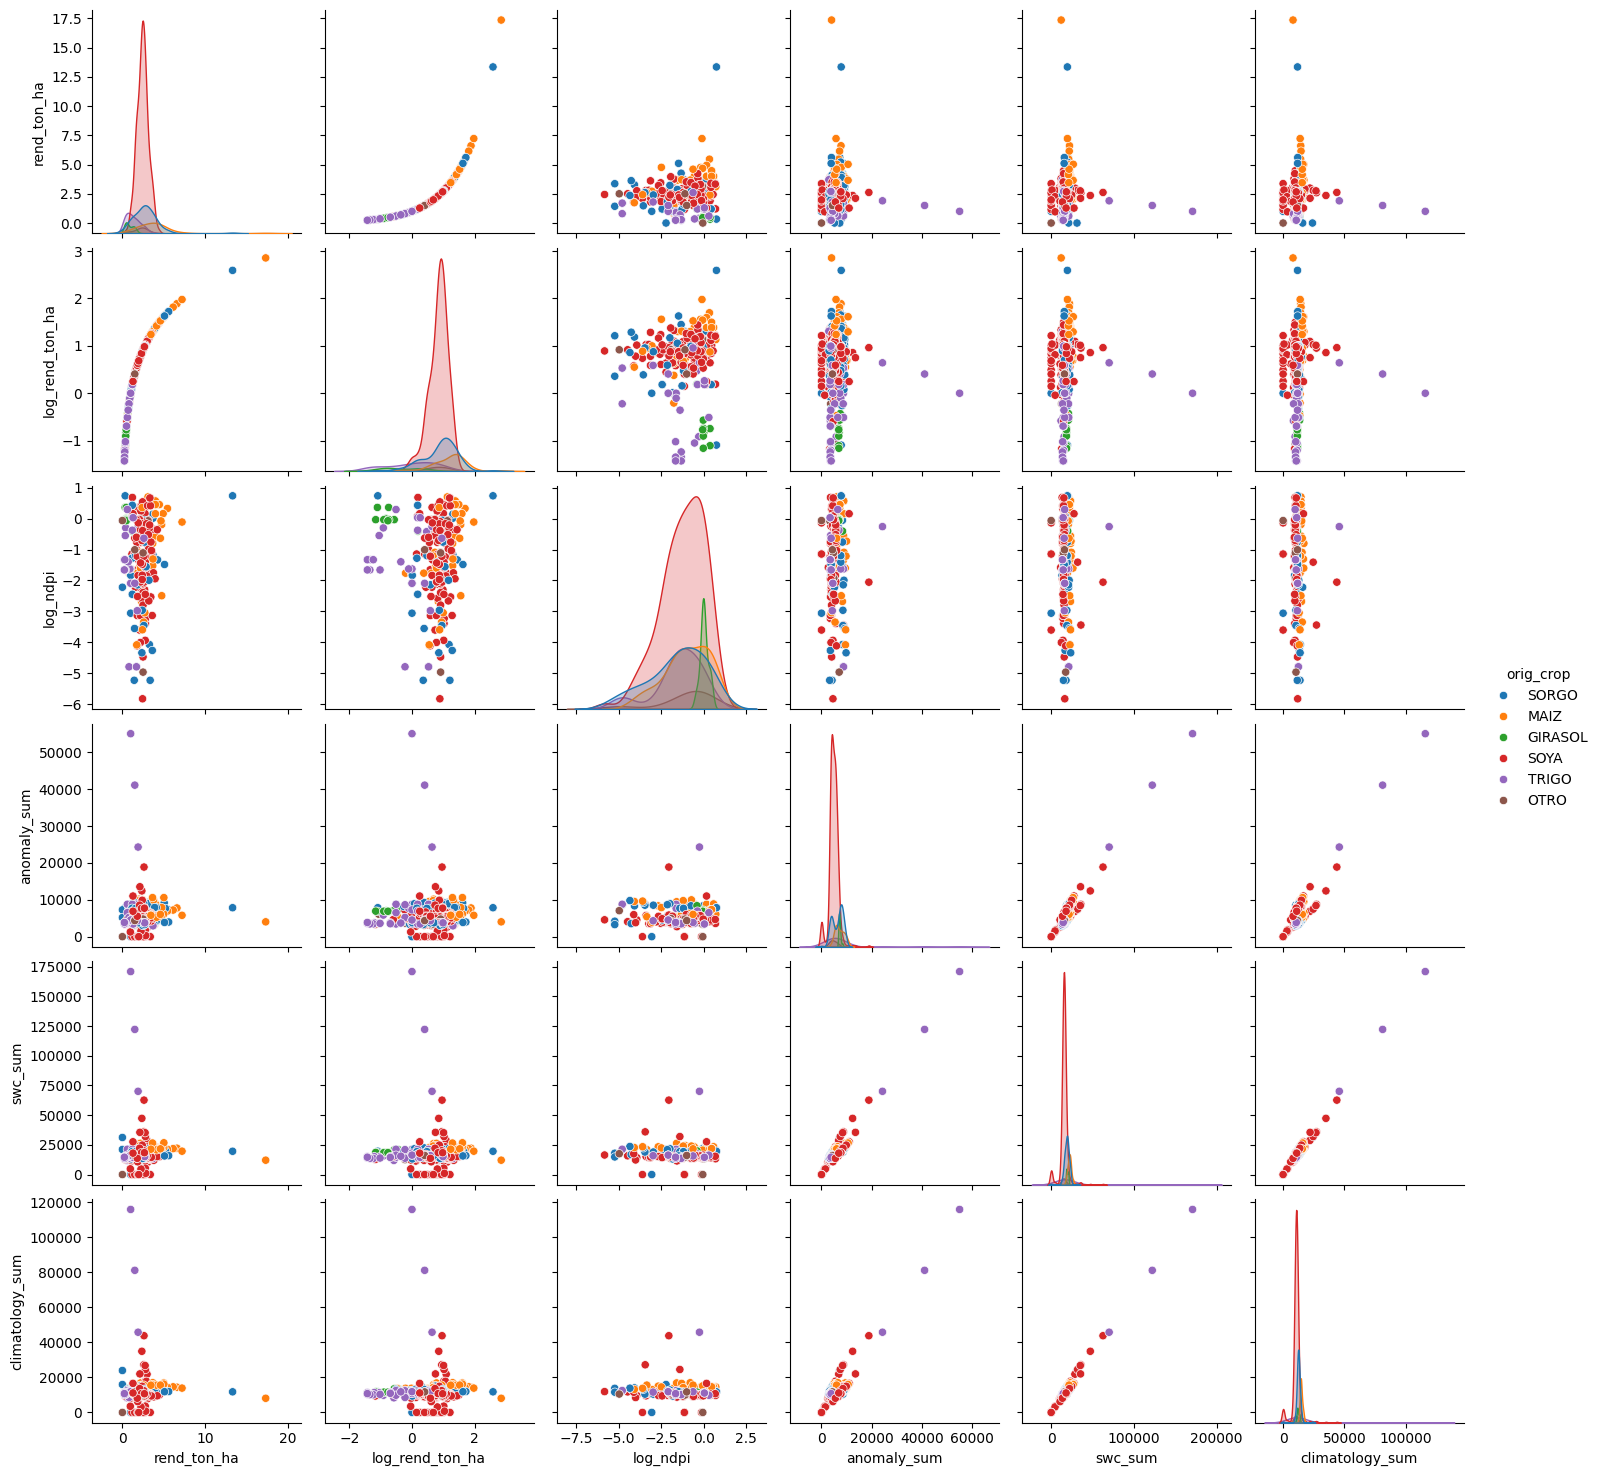

In [24]:
sns.pairplot(df, vars = ["rend_ton_ha", "log_rend_ton_ha", 'log_ndpi', 'anomaly_sum', 'swc_sum', 'climatology_sum'], hue='orig_crop')

# Regress yields on NDPI

In [29]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
df_aux = df[~(df["log_rend_ton_ha"].isin([np.inf, -np.inf]))].copy()
X = df_aux["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df_aux["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.780
Date:                Mon, 06 Jan 2025   Prob (F-statistic):             0.0959
Time:                        16:28:04   Log-Likelihood:                -538.20
No. Observations:                 649   AIC:                             1080.
Df Residuals:                     647   BIC:                             1089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7709      0.022     35.223   

In [ ]:
# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
X = df["ndpi_anomaly"]
"ndpi_anomaly"
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df["log_rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_rend_ton_ha   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.717
Date:                Thu, 02 Jan 2025   Prob (F-statistic):             0.0998
Time:                        01:22:01   Log-Likelihood:                -539.22
No. Observations:                 652   AIC:                             1082.
Df Residuals:                     650   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7706      0.022     35.388   

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Regress yields on anomaly

In [ ]:
df = df_backup.copy()
df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            rend_ton_ha   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     13.21
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           0.000300
Time:                        19:06:02   Log-Likelihood:                -1152.1
No. Observations:                 681   AIC:                             2308.
Df Residuals:                     679   BIC:                             2317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0450      0.094     21.743      

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.describe()

anomaly_std = 3351
anomaly_std * 5.471e-05

0.18333321

In [ ]:
5.471e-05

5.471e-05

In [ ]:
1 / 45

0.022222222222222223

In [ ]:
df.describe()

,producer_id,seedtime,Unnamed: 10,show_furrow,n_plants_m,n_plants_ha,plant_height,rend_ton_ha,id_lot,cultivation_id,...,Month,Year,pixel_id,anomaly_sum,swc_sum,climatology_sum,month,year,log_rend_ton_ha,log_anomaly
count,681.000000,651,0.0,652.000000,651.000000,6.510000e+02,651.000000,681.000000,681.000000,681.000000,...,643.000000,643.000000,681.000000,681.000000,681.000000,681.000000,651.000000,651.000000,681.000000,681.000000
mean,13.185022,2016-02-01 04:12:09.953916928,NaN,0.446258,14.270353,4.288359e+05,0.930492,2.333614,47.437592,3.409692,...,6.323484,2015.936236,2.133627,5274.824656,16379.622614,11104.797958,8.121352,2015.451613,-inf,-inf
min,1.000000,2013-03-10 00:00:00,NaN,0.170000,2.000000,3.846154e+04,0.450000,0.000000,1.000000,0.000000,...,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,-inf,-inf
25%,12.000000,2014-12-04 00:00:00,NaN,0.420000,11.000000,2.307692e+05,0.650000,1.635705,21.000000,2.000000,...,3.000000,2015.000000,0.000000,3845.121212,14551.000000,10101.878788,4.000000,2014.000000,0.492074,8.254560
50%,14.000000,2015-12-17 00:00:00,NaN,0.500000,13.000000,2.826087e+05,0.750000,2.397714,47.000000,4.000000,...,7.000000,2016.000000,0.000000,5090.901515,15989.000000,11084.598485,8.000000,2015.000000,0.874516,8.535210
75%,16.000000,2017-04-02 12:00:00,NaN,0.520000,15.000000,3.285714e+05,1.100000,2.870000,67.000000,4.000000,...,9.000000,2017.000000,0.000000,6443.151515,18552.000000,12196.772727,11.000000,2017.000000,1.054312,8.770773
max,19.000000,2018-05-12 00:00:00,NaN,0.520000,150.000000,8.823529e+06,2.200000,17.351672,106.000000,6.000000,...,12.000000,2018.000000,19.000000,55003.878788,170802.000000,115798.121212,12.000000,2018.000000,2.853689,10.915159
std,4.579797,NaN,NaN,0.101782,11.128306,7.090318e+05,0.422542,1.327449,30.177943,1.351848,...,3.001224,1.367392,5.632213,3351.774076,9517.777787,6384.459413,3.463527,1.367325,NaN,NaN


In [ ]:
0.18 / 2.33

0.07725321888412016

In [ ]:
# plt.scatter(df["anomaly_sum"], df["rend_ton_ha"])

# Filter rows with large SWC anomaly values

In [69]:
#data_folder = Path("../../Data/regressions")
#filename = "yields_panel.csv"
#df = pd.read_csv(data_folder / filename)

df = df.dropna(subset=["rend_ton_ha", "anomaly_sum"])
df = df[df["anomaly_sum"] < 10000]
# df = df[df["anomaly_sum"] > 0]
df = df[df["rend_ton_ha"] < 10]
# df["rend_ton_ha"] = df["rend_ton_ha"]
# Assuming your DataFrame is named 'df'
# Extract the log of 'rend_ton_ha' and 'ndpi'
df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
# df["log_ndpi"] = np.log(df["ndpi"])
df["log_anomaly"] = np.log(df["anomaly_sum"])

# Create the design matrix X
# X = df['log_ndpi']
# X = df["ndvi_anomaly"]
# X = df["vhi_anomaly"]
# X = df["pp_anomaly"]
# X = df["log_anomaly"]
# X = df["swc_sum"]
X = df["anomaly_sum"]
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
# y = df["log_rend_ton_ha"]
y = df["rend_ton_ha"]

# Replace Infs with a large finite value
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# X.fillna(1e10, inplace=True)  # Or any other large finite value you choose

# Assuming y is your dependent variable
# Check if y contains any NaNs or Infs and handle them similarly if needed
# y.replace([np.inf, -np.inf], np.nan, inplace=True)
# y.fillna(y.mean(), inplace=True)

# Fit the linear regression model
red_model = sm.OLS(y, X)
red_results = red_model.fit()

# Print the regression results
print(red_results.summary())

                            OLS Regression Results                            
Dep. Variable:            rend_ton_ha   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     8.192
Date:                Mon, 06 Jan 2025   Prob (F-statistic):            0.00434
Time:                        18:56:00   Log-Likelihood:                -922.45
No. Observations:                 640   AIC:                             1849.
Df Residuals:                     638   BIC:                             1858.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0759      0.120     17.331      

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='anomaly_sum', ylabel='rend_ton_ha'>

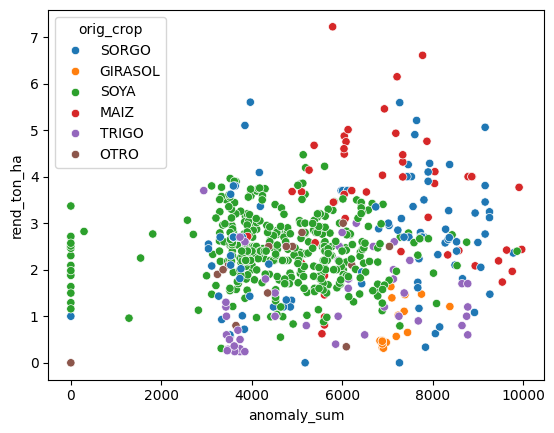

In [105]:
sns.scatterplot(df, x = "anomaly_sum", y = "rend_ton_ha", hue = "orig_crop")

In [33]:
anomaly_std = df["anomaly_sum"].std()
print(f"The standard deviation of the anomaly is: {anomaly_std:.2f}")
beta = results.params["anomaly_sum"]
print(f"The anomaly coefficient is: {beta:.6f}")

The standard deviation of the anomaly is: 1894.17
The anomaly coefficient is: 0.000061


In [ ]:
yield_mean = df["rend_ton_ha"].mean()

In [ ]:
# yield_mean

In [ ]:
# beta * anomaly_std

In [ ]:
print(
    f"A 1 standard deviation drought would reduce the yield by: {beta * anomaly_std:.2f} or {beta * anomaly_std / yield_mean*100:.2f}%"
)
print(
    f"A 2 standard deviation drought would reduce the yield by: {2*beta * anomaly_std:.2f} or {2*beta * anomaly_std / yield_mean*100:.2f}%"
)

A 1 standard deviation drought would reduce the yield by: 0.34 or 14.96%
A 2 standard deviation drought would reduce the yield by: 0.69 or 29.92%


In [ ]:
0.28763948497854075 * 2

0.5752789699570815

# Regress yields on anomaly controlling by crop

In [54]:
# Drop rows with missing values in the relevant columns
df = df.dropna(subset=["rend_ton_ha", "anomaly_sum", "orig_crop"])

# Filter the DataFrame based on specific conditions
df = df[df["anomaly_sum"] < 10000]
df = df[df["rend_ton_ha"] < 10]

# Transform variables by taking the log
#df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
#df["log_anomaly"] = np.log(df["anomaly_sum"])

# Encode the categorical variable 'orig_crop' using dummy variables
orig_crop_dummies = pd.get_dummies(df["orig_crop"],
                                   drop_first=True,
                                   dtype=int)

# Create the design matrix X, including 'anomaly_sum' and dummy variables
X = pd.concat([df["anomaly_sum"], orig_crop_dummies], axis=1)
#X =  df["anomaly_sum"]
X.apply(pd.to_numeric, errors = 'coerce')
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df["rend_ton_ha"]

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            rend_ton_ha   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     37.63
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           4.20e-39
Time:                        17:06:38   Log-Likelihood:                -828.92
No. Observations:                 640   AIC:                             1672.
Df Residuals:                     633   BIC:                             1703.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5722      0.268      2.132      

# Regress yields on anomaly controlling by crop and multiple slopes

In [103]:
# Drop rows with missing values in the relevant columns
df = df.dropna(subset=["rend_ton_ha", "anomaly_sum", "orig_crop"])

# Filter the DataFrame based on specific conditions
df = df[df["anomaly_sum"] < 10000]
df = df[df["rend_ton_ha"] < 10]

# Transform variables by taking the log
#df["log_rend_ton_ha"] = np.log(df["rend_ton_ha"])
#df["log_anomaly"] = np.log(df["anomaly_sum"])

# Encode the categorical variable 'orig_crop' using dummy variables
orig_crop_dummies = pd.get_dummies(df["orig_crop"],
                                   drop_first=True,
                                   dtype=int)

interaction_terms = orig_crop_dummies.mul(df['anomaly_sum'], axis = 0)
interaction_terms.columns = [f"{col}_interaction" for col in interaction_terms.columns]
# Create the design matrix X, including 'anomaly_sum' and dummy variables
X = pd.concat([df["anomaly_sum"], interaction_terms], axis=1)
#X =  df["anomaly_sum"]
X.apply(pd.to_numeric, errors = 'coerce')
X = sm.add_constant(X)  # Add a constant term

# Create the target variable y
y = df["rend_ton_ha"]

# Fit the linear regression model
full_model = sm.OLS(y, X)
full_results = full_model.fit()

# Print the regression results
print(full_results.summary())

                            OLS Regression Results                            
Dep. Variable:            rend_ton_ha   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     32.81
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.75e-34
Time:                        20:14:31   Log-Likelihood:                -839.88
No. Observations:                 640   AIC:                             1694.
Df Residuals:                     633   BIC:                             1725.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2266      0.11

In [99]:
df_results = pd.DataFrame({
    'column': list(full_results.params.index),
    'value': list(full_results.params.values),
})
df_results['std_anomaly'] = df['anomaly_sum'].std()

df.groupby('orig_crop').agg(rend = (''))

,column,value,std_anomaly
0,const,2.226636,1894.168936
1,anomaly_sum,-0.000190,1894.168936
2,MAIZ_interaction,0.000362,1894.168936
3,OTRO_interaction,0.000171,1894.168936
4,SORGO_interaction,0.000261,1894.168936
5,SOYA_interaction,0.000224,1894.168936
6,TRIGO_interaction,0.000045,1894.168936


In [90]:
list_crop = list(df['orig_crop'].unique()):
for list_

['SORGO', 'GIRASOL', 'SOYA', 'MAIZ', 'TRIGO', 'OTRO']

# Choose a model

In [87]:
import statsmodels.api as sm
from scipy.stats import f
import numpy as np

def compare_models(reduced_model, full_model):
    """
    Compare two nested models (reduced and full) using AIC, BIC, Bayes factor, and F-test.

    Parameters:
        reduced_model: Fitted statsmodels OLS model (reduced model).
        full_model: Fitted statsmodels OLS model (full model).

    Returns:
        dict: A dictionary with AIC, BIC, Bayes factor, F-statistic, and p-value.
    """
    # Extract AIC and BIC
    aic_reduced = reduced_model.aic
    bic_reduced = reduced_model.bic
    aic_full = full_model.aic
    bic_full = full_model.bic

    # Residual Sum of Squares and Degrees of Freedom
    RSS_reduced = reduced_model.ssr
    RSS_full = full_model.ssr
    df_reduced = reduced_model.df_resid
    df_full = full_model.df_resid

    # F-test
    num = (RSS_reduced - RSS_full) / (df_reduced - df_full)  # Numerator
    den = RSS_full / df_full  # Denominator
    F_stat = num / den
    p_value = f.sf(F_stat, df_reduced - df_full, df_full)

    # Bayes Factor (BIC-based approximation)
    bayes_factor = np.exp((bic_reduced - bic_full) / 2)

    return {
        "AIC (Reduced)": aic_reduced,
        "AIC (Full)": aic_full,
        "BIC (Reduced)": bic_reduced,
        "BIC (Full)": bic_full,
        "Bayes Factor": bayes_factor,
        "F-statistic": F_stat,
        "p-value": p_value
    }


In [102]:
compare_models(red_results, full_results)

{'AIC (Reduced)': 1848.892321936774,
 'AIC (Full)': 1693.7558573802485,
 'BIC (Reduced)': 1857.8152582894813,
 'BIC (Full)': 1724.9861346147245,
 'Bayes Factor': 6.973932249953235e+28,
 'F-statistic': 37.267510017793136,
 'p-value': 1.6031661612929323e-33}

In [73]:
full_results.compare_f_test(red_results)

(37.267510017793136, 1.6031661612929323e-33, 5.0)

In [82]:
from statsmodels.stats.anova import anova_lm

anova_lm(red_results, full_results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,638.0,669.301990,0.0,NaN,NaN,NaN
1,633.0,517.086223,5.0,152.215766,37.26751,1.603166e-33
